In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kaggle

In [1]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 652M/653M [00:35<00:00, 18.8MB/s]
100% 653M/653M [00:35<00:00, 19.5MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('us-accidents.zip', 'r') as zip_ref:
    zip_ref.extractall('us-accidents')

In [4]:
import pandas as pd

file_path = '/content/us-accidents/US_Accidents_March23.csv'

df = pd.read_csv(file_path, nrows=4000000)


In [5]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                      3020
City                          96
County                         0
State                          0
Zipcode                      652
Country                        0
Timezone                    3276
Airport_Code                8290
Weather_Timestamp          49355
Temperature(F)             71110
Wind_Chill(F)            1675750
Humidity(%)                75890
Pressure(in)               60661
Visibility(mi)             80532
Wind_Direction             67611
Wind_Speed(mph)           413253
Precipitation(in)        1802020
Weather_Condition          79223
Amenity                        0
Bump      

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4.000000e+06,4.000000e+06,4.000000e+06,597238.000000,597238.000000,4.000000e+06,3.928890e+06,2.324250e+06,3.924110e+06,3.939339e+06,3.919468e+06,3.586747e+06,2.197980e+06
mean,2.311414e+00,3.617822e+01,-9.364887e+01,36.485415,-95.056940,3.128967e-01,6.223662e+01,5.654051e+01,6.584219e+01,2.967493e+01,9.100470e+00,7.914684e+00,1.211047e-02
std,5.101885e-01,4.854093e+00,1.658358e+01,5.069098,17.823378,1.703760e+00,1.868072e+01,2.308470e+01,2.254920e+01,8.591752e-01,2.731189e+00,5.271016e+00,1.557143e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,24.570107,-124.539056,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.338571e+01,-1.118740e+02,33.677480,-117.437796,0.000000e+00,5.000000e+01,3.900000e+01,4.900000e+01,2.954000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.552393e+01,-8.752456e+01,36.810766,-87.918250,0.000000e+00,6.400000e+01,6.100000e+01,6.800000e+01,2.991000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.003774e+01,-8.079067e+01,40.491682,-80.277200,1.000000e-02,7.600000e+01,7.500000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,8.228000e+02,3.647000e+01


In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency tables for each categorical variable
contingency_tables = {}
categorical_variables = ['Weather_Condition', 'Visibility(mi)']

for variable in categorical_variables:
    contingency_tables[variable] = pd.crosstab(df[variable], df['Severity'])

# Perform chi-squared test for each contingency table
chi2_results = {}
for variable, table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_results[variable] = {'chi2': chi2, 'p-value': p, 'dof': dof}

# Print chi-squared test results
for variable, result in chi2_results.items():
    print(f"Chi-squared test results for {variable}:")
    print(f"  Chi2 value: {result['chi2']}")
    print(f"  P-value: {result['p-value']}")
    print(f"  Degrees of Freedom: {result['dof']}")
    print()


Chi-squared test results for Weather_Condition:
  Chi2 value: 62859.84829151728
  P-value: 0.0
  Degrees of Freedom: 408

Chi-squared test results for Visibility(mi):
  Chi2 value: 6785.8029811428205
  P-value: 0.0
  Degrees of Freedom: 249



Weather conditions exhibit a significant association with accident severity (χ² = 62859.85, p < 0.001, df = 408). Visibility conditions also show a significant association with accident severity (χ² = 6785.80, p < 0.001, df = 249). Both weather and visibility play important roles in determining accident severity. The high chi-squared values and low p-values indicate strong evidence against the null hypothesis.

Since , Sunrise_Sunset, country , Civil_Twilight Nautical_Twilight
Astronomical_Twilight
not important I removed those. also value can be defined using start time

In [9]:

important_columns = [
    'ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
    'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
    'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
    'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump',
    'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
    'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]


df = df[important_columns]


print(df.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  Distance(mi)  \
0  39.865147 -84.058723          0.01   
1  39.928059 -82.831184          0.01   
2  39.063148 -84.032608          0.01   
3  39.747753 -84.205582          0.01   
4  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg 

In [10]:

numerical_columns = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_columns.corr()


print(correlation_matrix)


                   Severity  Start_Lat  Start_Lng  Distance(mi)  \
Severity           1.000000   0.063738  -0.003414      0.096538   
Start_Lat          0.063738   1.000000   0.009912      0.058637   
Start_Lng         -0.003414   0.009912   1.000000      0.025898   
Distance(mi)       0.096538   0.058637   0.025898      1.000000   
Temperature(F)    -0.015385  -0.414721  -0.053511     -0.039481   
Wind_Chill(F)     -0.054782  -0.472747  -0.081569     -0.032707   
Humidity(%)       -0.009251   0.021393   0.180614      0.008405   
Pressure(in)       0.026769  -0.121083   0.142372     -0.062460   
Visibility(mi)    -0.009323  -0.061737  -0.040378     -0.019119   
Wind_Speed(mph)    0.045149   0.054860   0.049384      0.010270   
Precipitation(in)  0.020823   0.005201   0.029126     -0.000668   

                   Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Severity                -0.015385      -0.054782    -0.009251      0.026769   
Start_Lat               -0.414721    

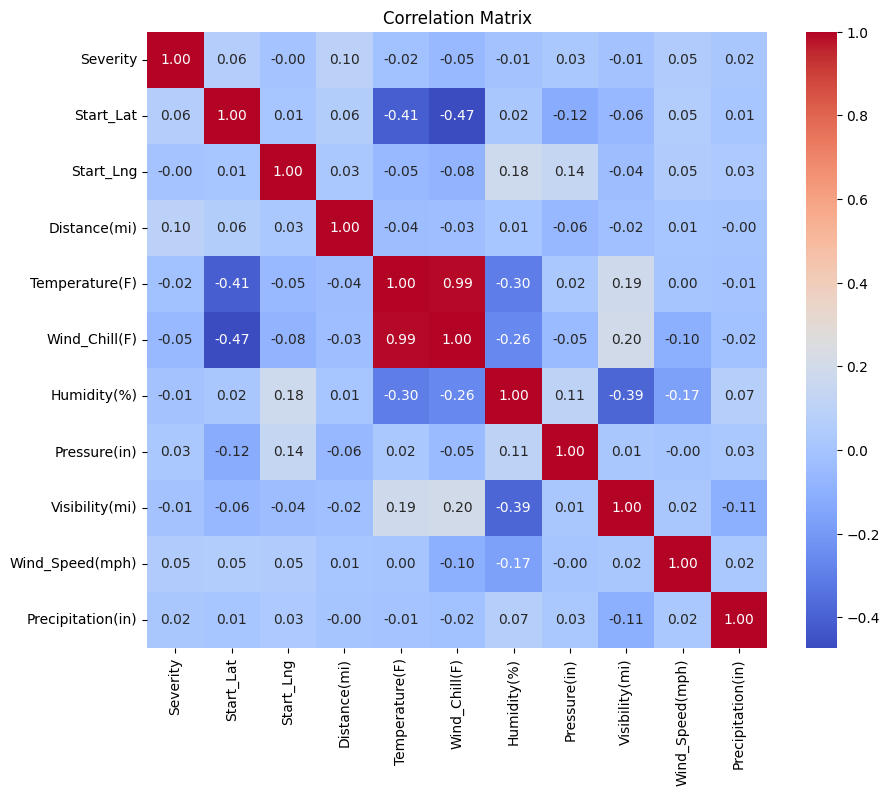

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-12-80128180839b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Visibility_Range', y='Accidents', data=visibility_accidents_df, palette="viridis")


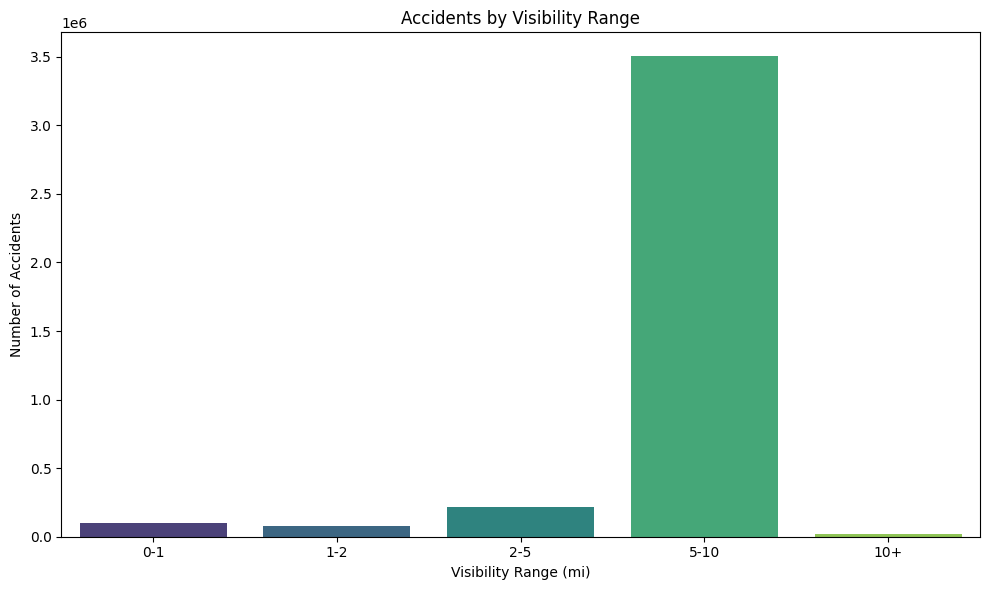

Visibility Range: 5-10 - Total Accidents: 3503045
Visibility Range: 2-5 - Total Accidents: 218189
Visibility Range: 0-1 - Total Accidents: 96864
Visibility Range: 1-2 - Total Accidents: 79572
Visibility Range: 10+ - Total Accidents: 18933


In [12]:
##Checking visibility has anything to do with accident .

import numpy as np

visibility_ranges = [(0, 1), (1, 2), (2, 5), (5, 10), (10, np.inf)]
visibility_labels = ['0-1', '1-2', '2-5', '5-10', '10+']


df['Visibility_Range'] = pd.cut(df['Visibility(mi)'], bins=[0, 1, 2, 5, 10, np.inf], labels=visibility_labels)

visibility_accidents_df = df.groupby('Visibility_Range').size().reset_index(name='Accidents')


visibility_accidents_df = visibility_accidents_df.sort_values(by='Accidents', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Visibility_Range', y='Accidents', data=visibility_accidents_df, palette="viridis")
plt.title('Accidents by Visibility Range')
plt.xlabel('Visibility Range (mi)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

for index, row in visibility_accidents_df.iterrows():
    print("Visibility Range:", row['Visibility_Range'], "- Total Accidents:", row['Accidents'])


<ipython-input-13-4de17e1285ae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Humidity_Range', y='Accidents', data=humidity_accidents_df, palette="viridis")


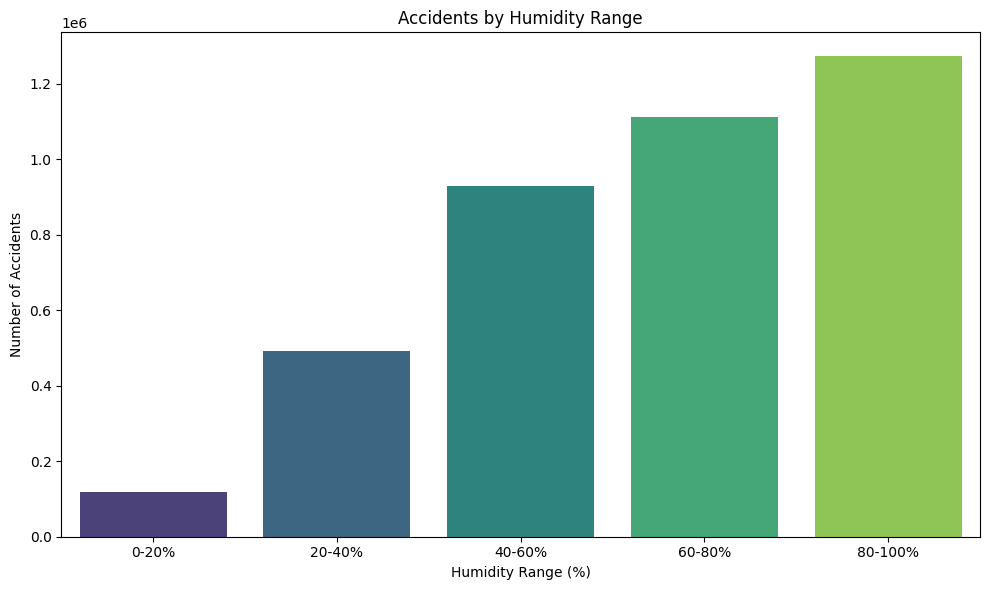

Humidity Range: 80-100% - Total Accidents: 1271949
Humidity Range: 60-80% - Total Accidents: 1111888
Humidity Range: 40-60% - Total Accidents: 929059
Humidity Range: 20-40% - Total Accidents: 491665
Humidity Range: 0-20% - Total Accidents: 119549


In [13]:
humidity_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
humidity_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

df['Humidity_Range'] = pd.cut(df['Humidity(%)'], bins=[0, 20, 40, 60, 80, 100], labels=humidity_labels)

humidity_accidents_df = df.groupby('Humidity_Range').size().reset_index(name='Accidents')
humidity_accidents_df = humidity_accidents_df.sort_values(by='Accidents', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Humidity_Range', y='Accidents', data=humidity_accidents_df, palette="viridis")
plt.title('Accidents by Humidity Range')
plt.xlabel('Humidity Range (%)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

for index, row in humidity_accidents_df.iterrows():
    print("Humidity Range:", row['Humidity_Range'], "- Total Accidents:", row['Accidents'])


<ipython-input-14-fe887a9daab1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temperature_Range', y='Accidents', data=temperature_accidents_df, palette="viridis")


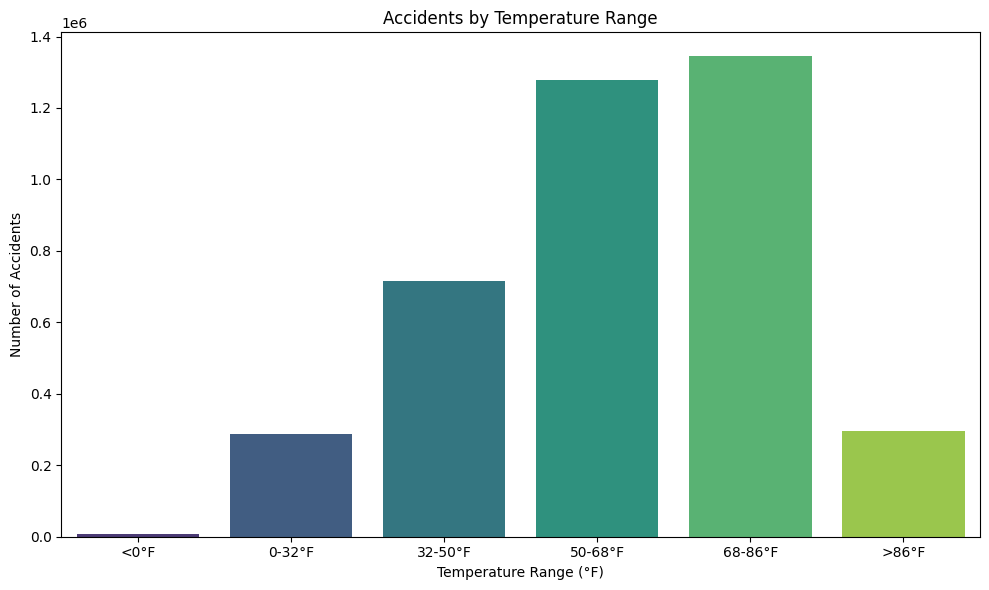

Temperature Range: 68-86°F - Total Accidents: 1344473
Temperature Range: 50-68°F - Total Accidents: 1277074
Temperature Range: 32-50°F - Total Accidents: 716699
Temperature Range: >86°F - Total Accidents: 296603
Temperature Range: 0-32°F - Total Accidents: 286173
Temperature Range: <0°F - Total Accidents: 7868


In [14]:
temperature_ranges = [float('-inf'), 0, 32, 50, 68, 86, float('inf')]
temperature_labels = ['<0°F', '0-32°F', '32-50°F', '50-68°F', '68-86°F', '>86°F']

df['Temperature_Range'] = pd.cut(df['Temperature(F)'], bins=temperature_ranges, labels=temperature_labels)

temperature_accidents_df = df.groupby('Temperature_Range').size().reset_index(name='Accidents')
temperature_accidents_df = temperature_accidents_df.sort_values(by='Accidents', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Temperature_Range', y='Accidents', data=temperature_accidents_df, palette="viridis")
plt.title('Accidents by Temperature Range')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

for index, row in temperature_accidents_df.iterrows():
    print("Temperature Range:", row['Temperature_Range'], "- Total Accidents:", row['Accidents'])



<ipython-input-15-27951e66f972>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.values, y=feature_counts.index, palette="viridis")


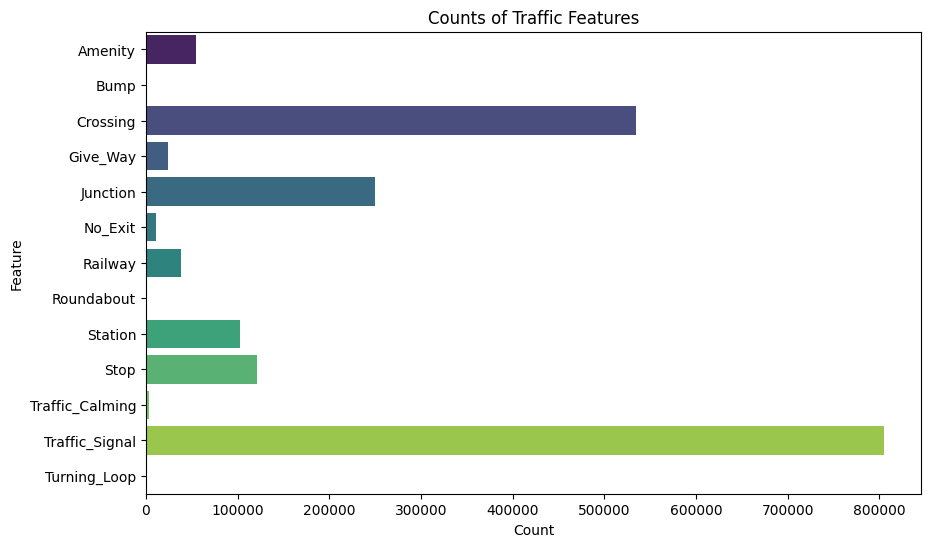

In [15]:
#Checking Traffic Feature any contribution to the accident
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

traffic_features = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

feature_counts = df[traffic_features].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette="viridis")
plt.title("Counts of Traffic Features")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

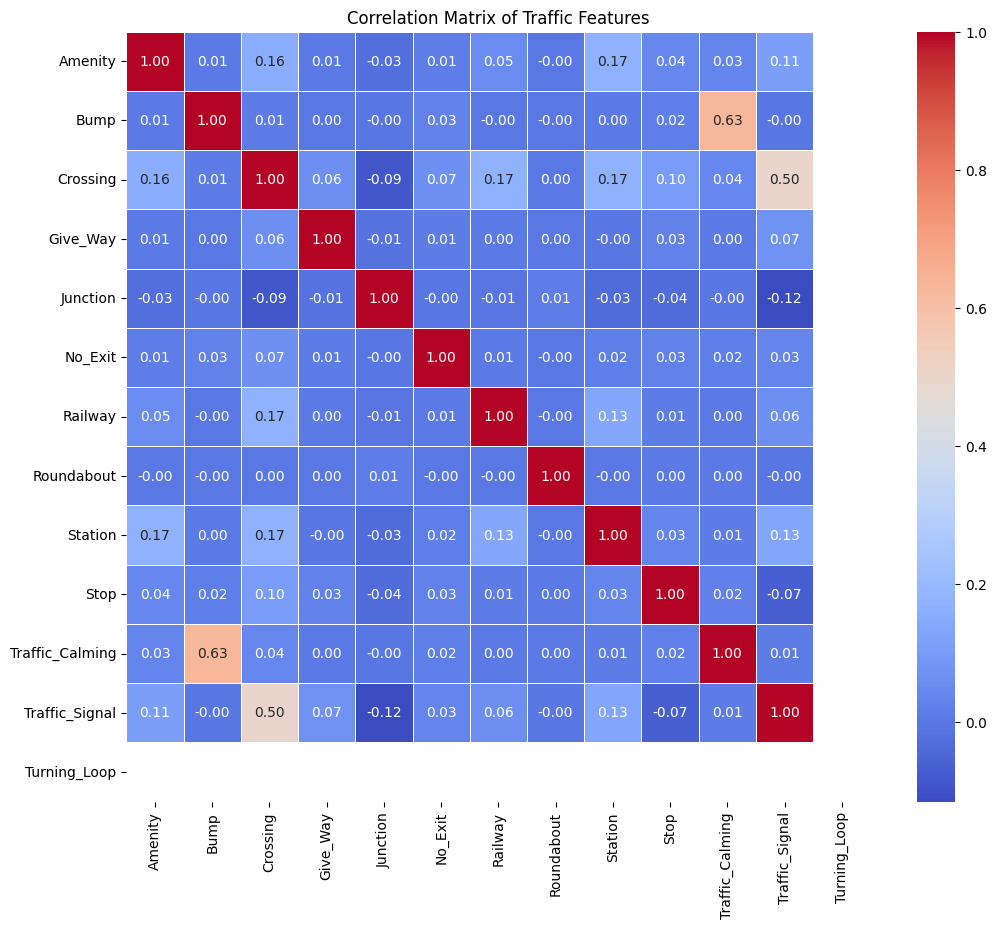

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[traffic_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Traffic Features")
plt.show()

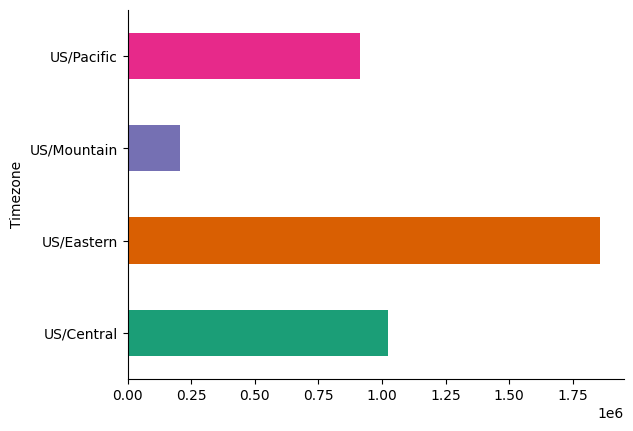

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Timezone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

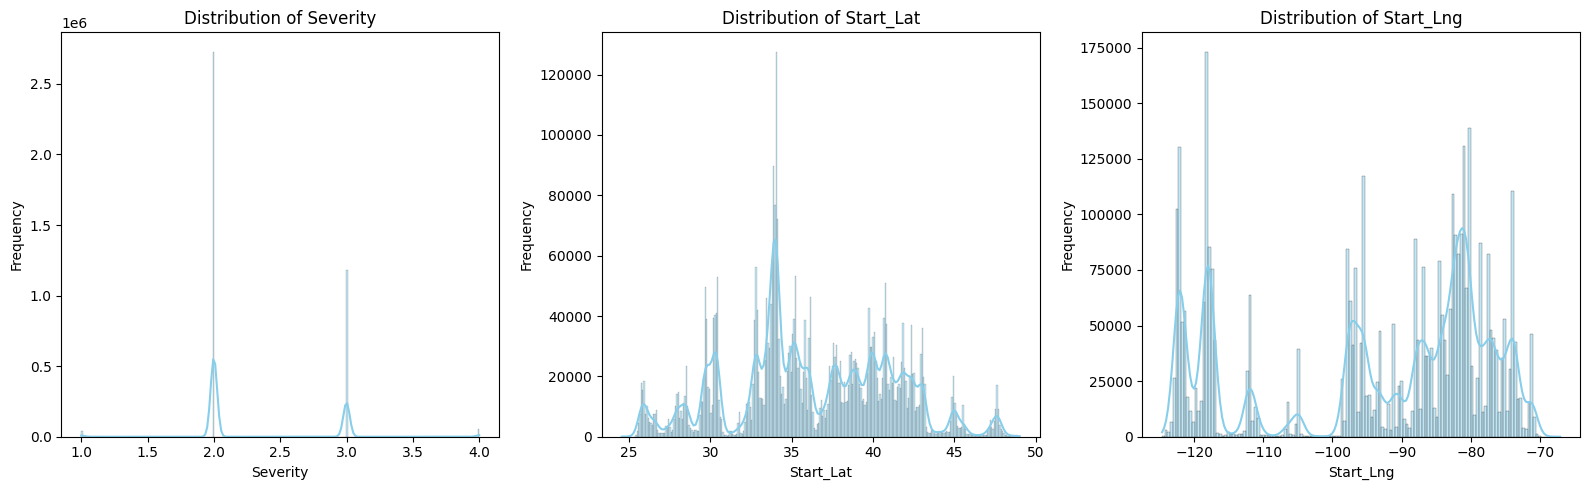

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns_batch2 = ['Severity', 'Start_Lat', 'Start_Lng']


plt.figure(figsize=(16, 5))
for i, column in enumerate(numerical_columns_batch2, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
                     'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
categorical_columns = ['Source', 'City', 'County', 'State', 'Timezone', 'Weather_Condition']

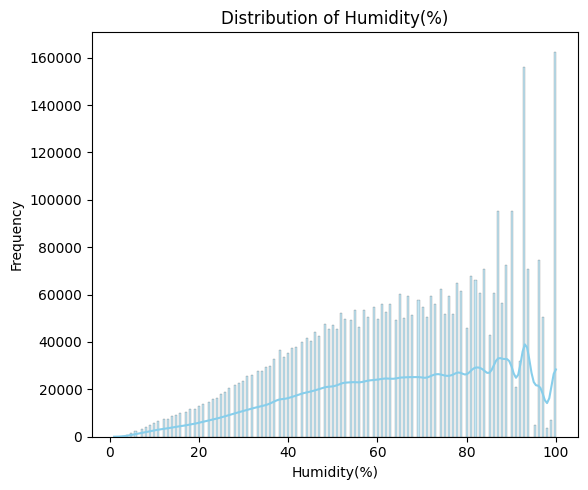

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns_batch3 = ['Humidity(%)']

plt.figure(figsize=(16, 5))
for i, column in enumerate(numerical_columns_batch3, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-21-075908aed6af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_weather.index, x=top10_weather.values, palette='viridis')


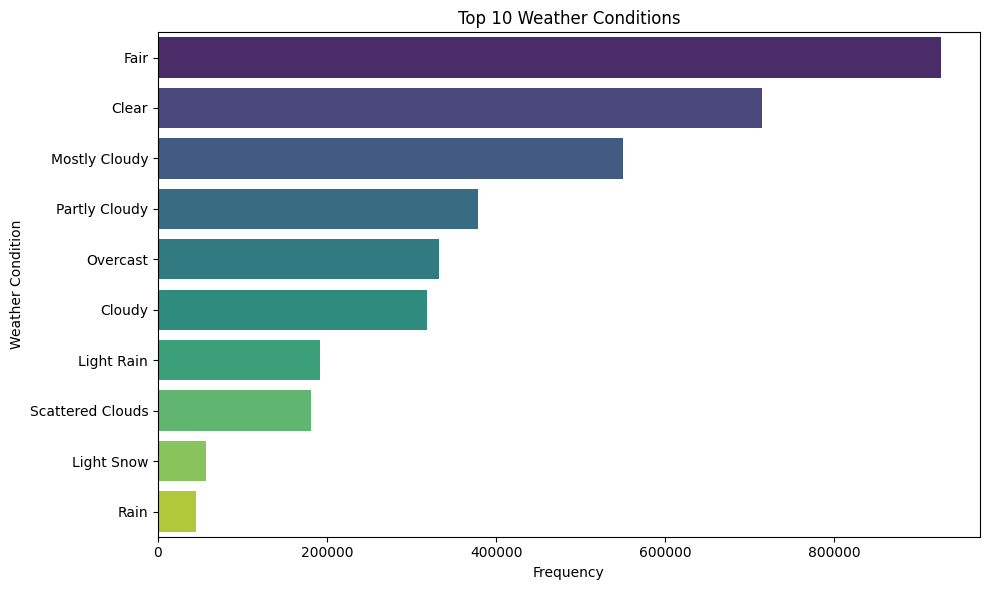

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_counts = df['Weather_Condition'].value_counts()

top10_weather = weather_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top10_weather.index, x=top10_weather.values, palette='viridis')
plt.title('Top 10 Weather Conditions')
plt.xlabel('Frequency')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

HIGH LEVEL Analysis of The Dataset


In [22]:
#Unique cities
cities = df.City.unique()
len(cities)

12442

Top 20 Cities with the Most Accidents:
City
Houston          121686
Charlotte         98831
Dallas            80735
Los Angeles       76591
Austin            71907
Raleigh           56298
Miami             49904
Baton Rouge       46300
Atlanta           46059
Nashville         45675
Oklahoma City     43542
Orlando           38568
Phoenix           31992
San Antonio       29628
Sacramento        28613
Greenville        27352
Seattle           27077
Richmond          26584
Minneapolis       25483
Columbia          25087
Name: count, dtype: int64


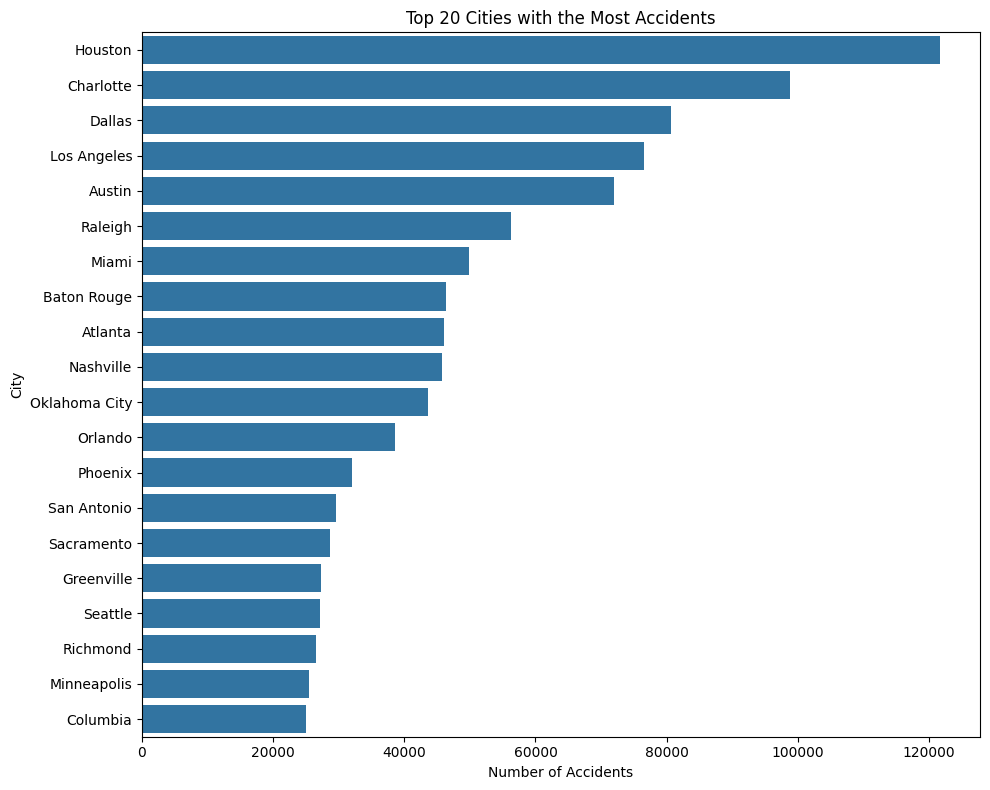

In [23]:
##1. Which city has the most accidents
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cities_by_accident = df.City.value_counts()
top20_city = cities_by_accident.head(20)


print("Top 20 Cities with the Most Accidents:")
print(top20_city)


#plot
plt.figure(figsize=(10, 8))
sns.barplot(y=top20_city.index, x=top20_city.values)
plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()




Top 20 States with the Most Accidents:
State
CA    787558
TX    395192
FL    351360
SC    251756
NC    207366
NY    184909
PA    139737
VA    122828
IL    120102
GA    108194
MI    105126
TN     95122
AZ     91337
LA     83909
OH     82562
MN     75629
AL     73908
OK     72559
WA     72394
NJ     65636
Name: count, dtype: int64


<ipython-input-24-b4ae6dba34d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_states.index, x=top20_states.values, palette='viridis')


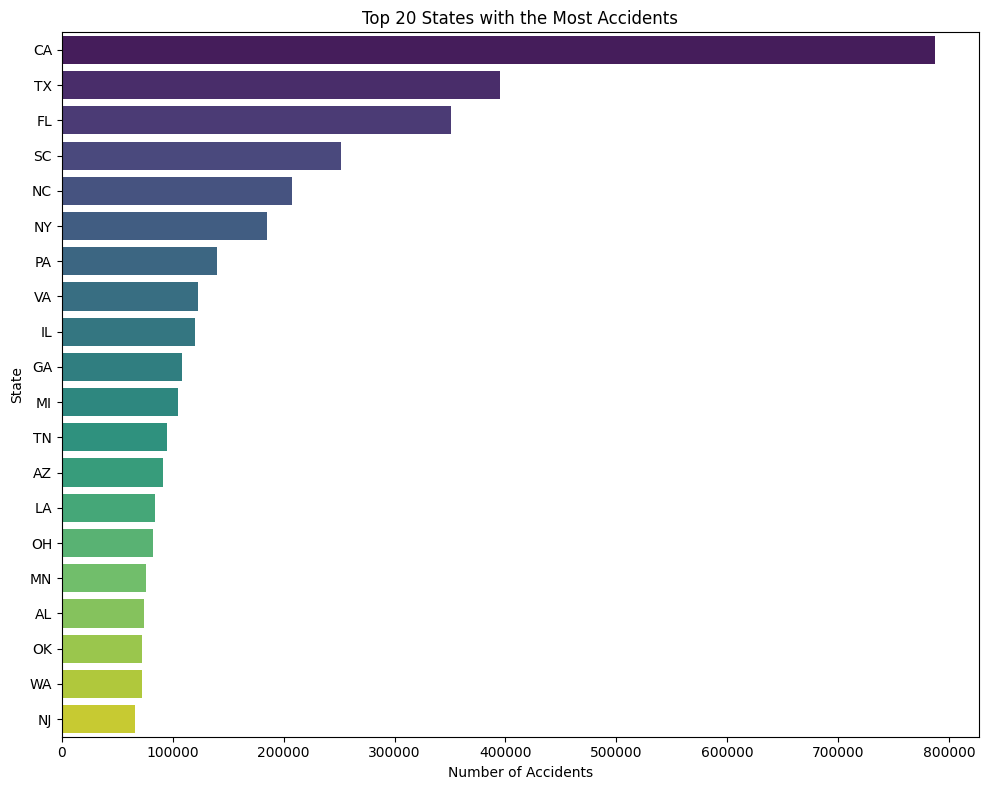

In [24]:
#2. States have highest accidents
import seaborn as sns
import matplotlib.pyplot as plt

accidents_by_state = df['State'].value_counts()
top20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top20_states)


plt.figure(figsize=(10, 8))
sns.barplot(y=top20_states.index, x=top20_states.values, palette='viridis')
plt.title('Top 20 States with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [25]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['Year'] = df['Start_Time'].dt.year

df = df.dropna(subset=['Start_Time'])

print(df.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Stre

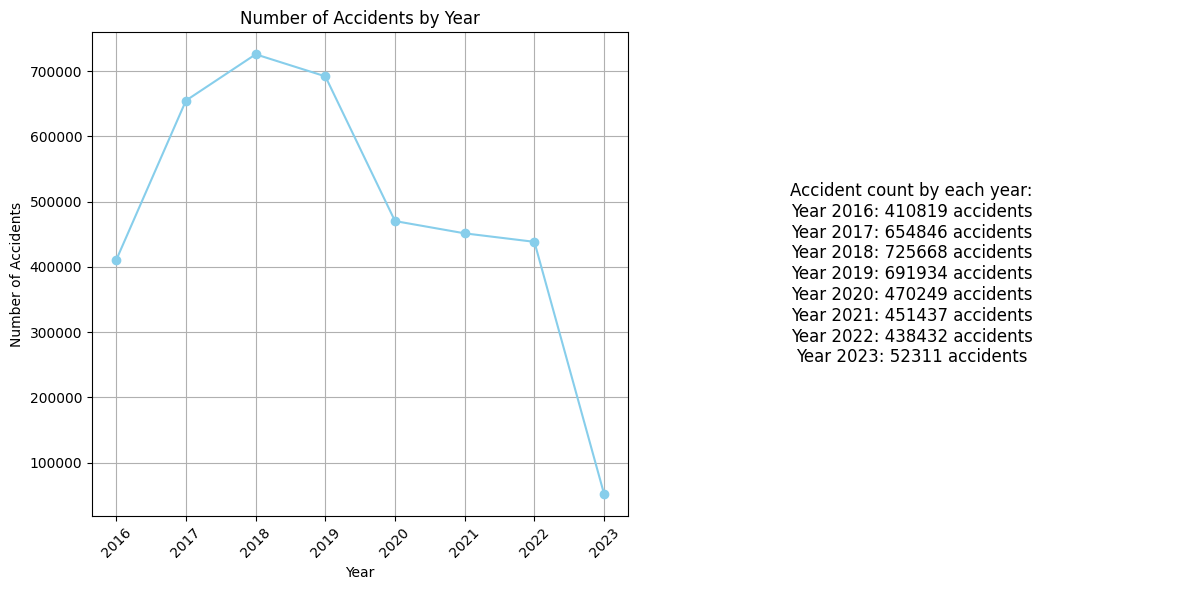

In [26]:
#3. Accidents by year
import pandas as pd
import matplotlib.pyplot as plt

df['Start_Time'] = pd.to_datetime(df['Start_Time'])


df['Year'] = df['Start_Time'].dt.year


accidents_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
accidents_by_year.plot(marker='o', color='skyblue', linestyle='-')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, "Accident count by each year:\n" + "\n".join([f"Year {year}: {count} accidents" for year, count in accidents_by_year.items()]),
         horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

<ipython-input-28-96270a027251>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_dates.index, x=top20_dates.values, palette="viridis")


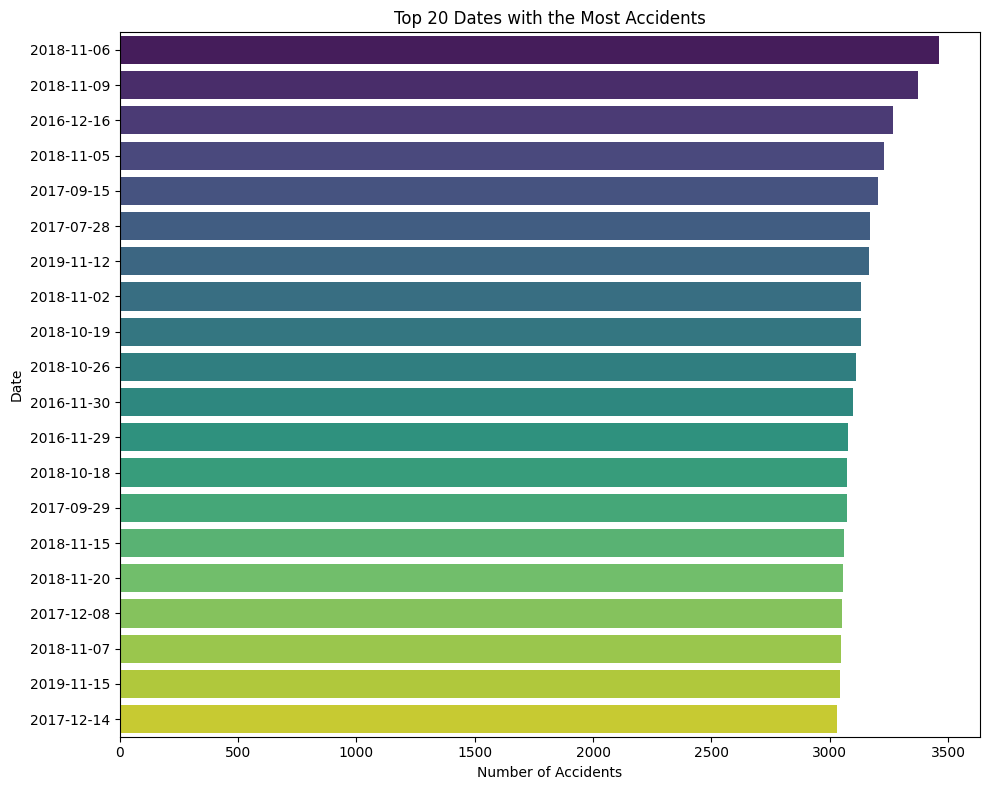

In [28]:
#4. Top 20 dates with the highest amount of accidents
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

start_time_df = pd.DataFrame(df['Start_Time'])

start_time_df['Start_Time'] = pd.to_datetime(start_time_df['Start_Time'])

start_time_df['Date'] = start_time_df['Start_Time'].dt.date

start_time_df['Hour'] = start_time_df['Start_Time'].dt.hour


accidents_by_date = start_time_df['Date'].value_counts()


top20_dates = accidents_by_date.head(20)


plt.figure(figsize=(10, 8))
sns.barplot(y=top20_dates.index, x=top20_dates.values, palette="viridis")
plt.title('Top 20 Dates with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


<ipython-input-29-ed71168094d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Start_Time', y='Accidents', data=hourly_accidents_df, palette="viridis")


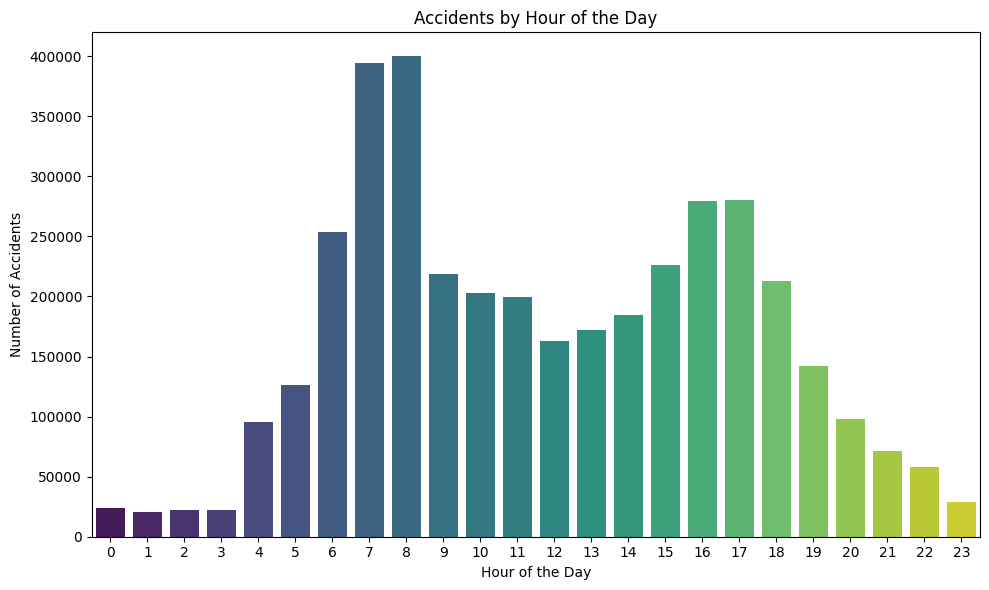

Hour: 8 - Total Accidents: 399895
Hour: 7 - Total Accidents: 394697
Hour: 17 - Total Accidents: 280499
Hour: 16 - Total Accidents: 279815
Hour: 6 - Total Accidents: 253308
Hour: 15 - Total Accidents: 226277
Hour: 9 - Total Accidents: 218671
Hour: 18 - Total Accidents: 212845
Hour: 10 - Total Accidents: 202587
Hour: 11 - Total Accidents: 199246
Hour: 14 - Total Accidents: 184231
Hour: 13 - Total Accidents: 171700
Hour: 12 - Total Accidents: 162873
Hour: 19 - Total Accidents: 142240
Hour: 5 - Total Accidents: 126092
Hour: 20 - Total Accidents: 97988
Hour: 4 - Total Accidents: 95189
Hour: 21 - Total Accidents: 71359
Hour: 22 - Total Accidents: 58417
Hour: 23 - Total Accidents: 28949
Hour: 0 - Total Accidents: 23689
Hour: 3 - Total Accidents: 22308
Hour: 2 - Total Accidents: 21962
Hour: 1 - Total Accidents: 20859


In [29]:
#5. Is rush hours have the most amount of accidents

hourly_accidents_df = start_time_df.groupby(start_time_df['Start_Time'].dt.hour).size().reset_index(name='Accidents').sort_values(by='Accidents', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Start_Time', y='Accidents', data=hourly_accidents_df, palette="viridis")
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

for index, row in hourly_accidents_df.iterrows():
    print("Hour:", row['Start_Time'], "- Total Accidents:", row['Accidents'])


<ipython-input-30-8770ada4f6cc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Start_Time', y='Accidents', data=monthly_accidents_df, palette="viridis")


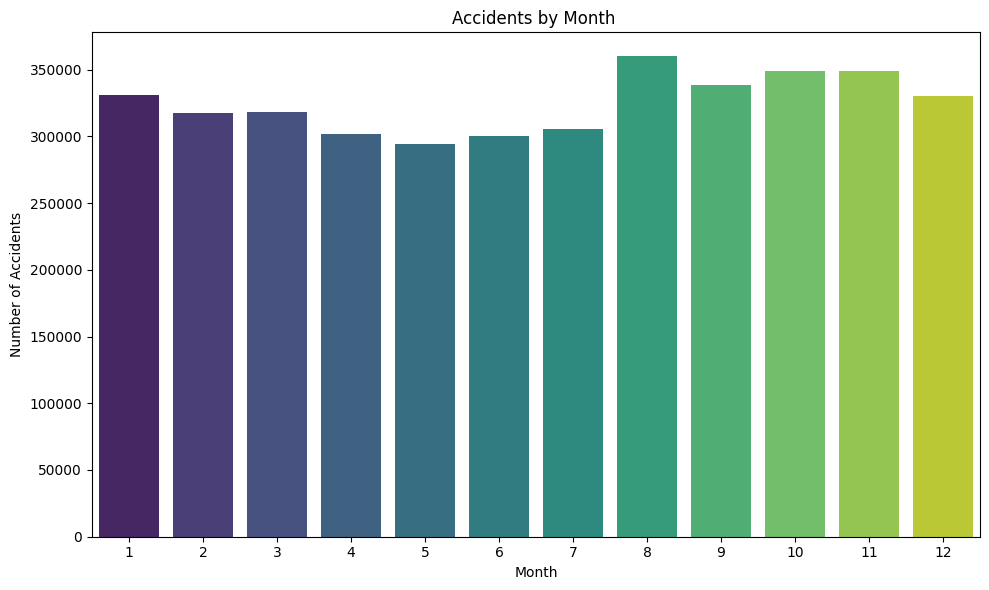

Month: 8 - Total Accidents: 359963
Month: 10 - Total Accidents: 349353
Month: 11 - Total Accidents: 349088
Month: 9 - Total Accidents: 338505
Month: 1 - Total Accidents: 331265
Month: 12 - Total Accidents: 329886
Month: 3 - Total Accidents: 318168
Month: 2 - Total Accidents: 317783
Month: 7 - Total Accidents: 305320
Month: 4 - Total Accidents: 302125
Month: 6 - Total Accidents: 300326
Month: 5 - Total Accidents: 293914


In [30]:
#6. Accidents by months
monthly_accidents_df = start_time_df.groupby(start_time_df['Start_Time'].dt.month).size().reset_index(name='Accidents')

monthly_accidents_df = monthly_accidents_df.sort_values(by='Accidents', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Start_Time', y='Accidents', data=monthly_accidents_df, palette="viridis")
plt.title('Accidents by Month ')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

for index, row in monthly_accidents_df.iterrows():
    print("Month:", row['Start_Time'], "- Total Accidents:", row['Accidents'])

Since I didn't import whole 2023, Chart is Declining the. 2016 to 2022 , 2018 and 2019 had the most accidents.

<ipython-input-31-f9763de1cd02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_zipcodes.index, x=top20_zipcodes.values, palette='viridis')


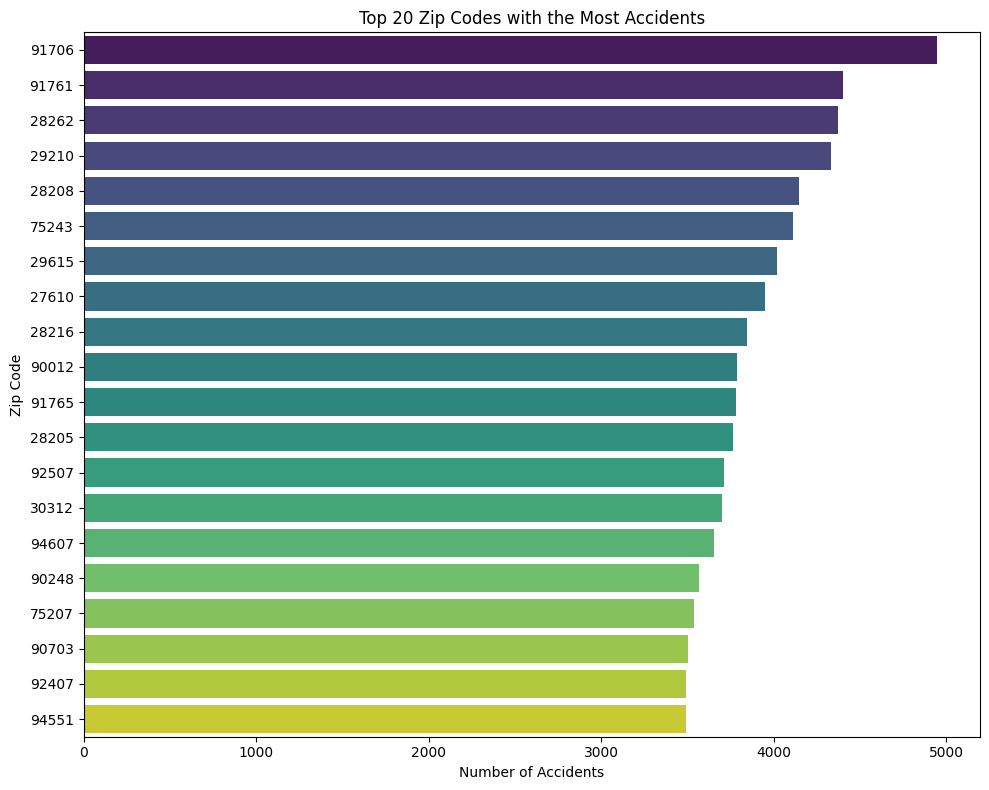

Zip Code: 91706 - Total Accidents: 4949
Zip Code: 91761 - Total Accidents: 4404
Zip Code: 28262 - Total Accidents: 4375
Zip Code: 29210 - Total Accidents: 4333
Zip Code: 28208 - Total Accidents: 4145
Zip Code: 75243 - Total Accidents: 4111
Zip Code: 29615 - Total Accidents: 4017
Zip Code: 27610 - Total Accidents: 3949
Zip Code: 28216 - Total Accidents: 3848
Zip Code: 90012 - Total Accidents: 3786
Zip Code: 91765 - Total Accidents: 3781
Zip Code: 28205 - Total Accidents: 3763
Zip Code: 92507 - Total Accidents: 3713
Zip Code: 30312 - Total Accidents: 3700
Zip Code: 94607 - Total Accidents: 3653
Zip Code: 90248 - Total Accidents: 3565
Zip Code: 75207 - Total Accidents: 3537
Zip Code: 90703 - Total Accidents: 3502
Zip Code: 92407 - Total Accidents: 3495
Zip Code: 94551 - Total Accidents: 3491


In [31]:
#7. Accidents by ZipCode
accidents_by_zipcode = df['Zipcode'].value_counts()
top20_zipcodes = accidents_by_zipcode.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(y=top20_zipcodes.index, x=top20_zipcodes.values, palette='viridis')
plt.title('Top 20 Zip Codes with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Zip Code')
plt.tight_layout()
plt.show()

for index, value in top20_zipcodes.items():
    print("Zip Code:", index, "- Total Accidents:", value)


<ipython-input-32-2c87751ae19f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_counties['County_State'], x=top20_counties['Accidents'], palette='viridis')


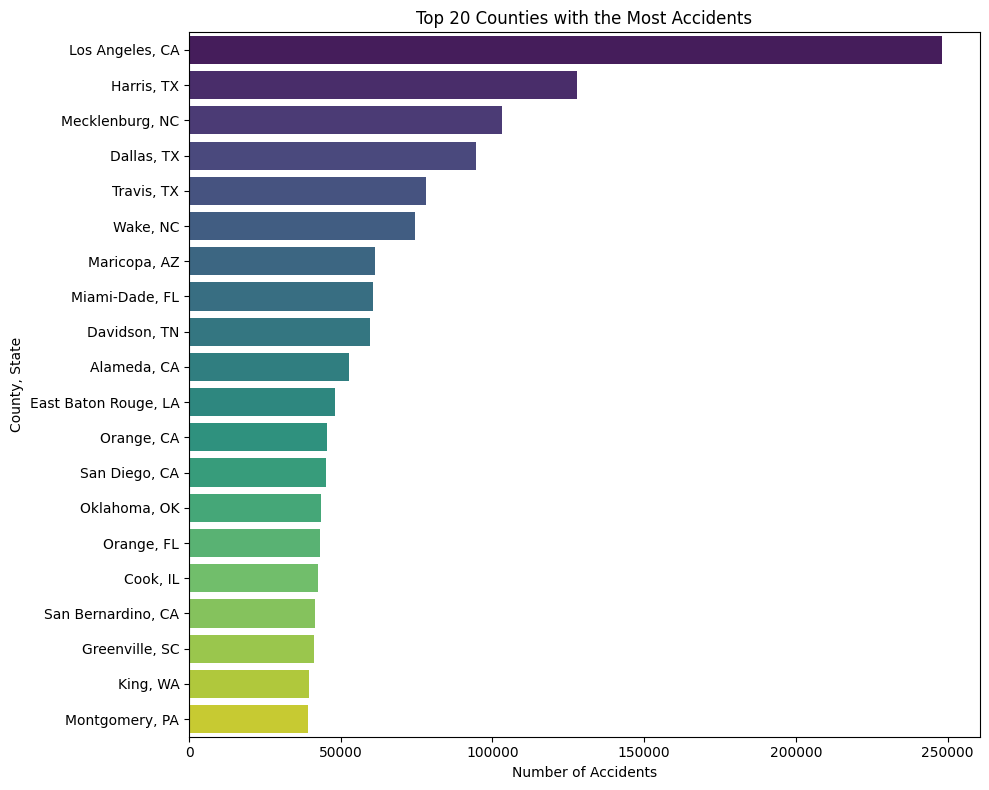

County: Los Angeles , State: CA - Total Accidents: 248286
County: Harris , State: TX - Total Accidents: 127995
County: Mecklenburg , State: NC - Total Accidents: 103020
County: Dallas , State: TX - Total Accidents: 94596
County: Travis , State: TX - Total Accidents: 78097
County: Wake , State: NC - Total Accidents: 74351
County: Maricopa , State: AZ - Total Accidents: 61336
County: Miami-Dade , State: FL - Total Accidents: 60572
County: Davidson , State: TN - Total Accidents: 59561
County: Alameda , State: CA - Total Accidents: 52779
County: East Baton Rouge , State: LA - Total Accidents: 48065
County: Orange , State: CA - Total Accidents: 45631
County: San Diego , State: CA - Total Accidents: 45269
County: Oklahoma , State: OK - Total Accidents: 43457
County: Orange , State: FL - Total Accidents: 43075
County: Cook , State: IL - Total Accidents: 42398
County: San Bernardino , State: CA - Total Accidents: 41382
County: Greenville , State: SC - Total Accidents: 41167
County: King , Stat

In [32]:
#Accidents by county
accidents_by_county_state = df.groupby(['State', 'County']).size().reset_index(name='Accidents')
accidents_by_county_state['County_State'] = accidents_by_county_state['County'] + ', ' + accidents_by_county_state['State']
top20_counties = accidents_by_county_state.nlargest(20, 'Accidents')

plt.figure(figsize=(10, 8))
sns.barplot(y=top20_counties['County_State'], x=top20_counties['Accidents'], palette='viridis')
plt.title('Top 20 Counties with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('County, State')
plt.tight_layout()
plt.show()

for index, row in top20_counties.iterrows():
    print("County:", row['County'], ", State:", row['State'], "- Total Accidents:", row['Accidents'])



<ipython-input-33-213df854d5ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20_streets['Street_State'], x=top20_streets['Accidents'], palette='viridis')


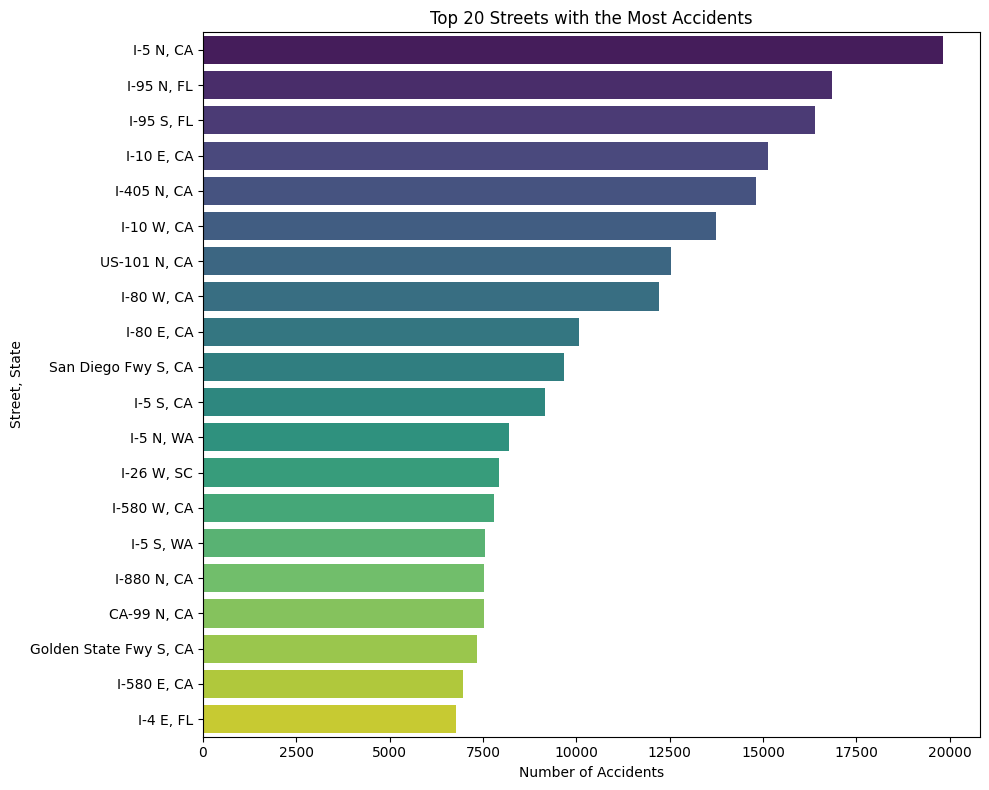

Street: I-5 N , State: CA - Total Accidents: 19818
Street: I-95 N , State: FL - Total Accidents: 16833
Street: I-95 S , State: FL - Total Accidents: 16399
Street: I-10 E , State: CA - Total Accidents: 15142
Street: I-405 N , State: CA - Total Accidents: 14819
Street: I-10 W , State: CA - Total Accidents: 13728
Street: US-101 N , State: CA - Total Accidents: 12532
Street: I-80 W , State: CA - Total Accidents: 12204
Street: I-80 E , State: CA - Total Accidents: 10084
Street: San Diego Fwy S , State: CA - Total Accidents: 9679
Street: I-5 S , State: CA - Total Accidents: 9153
Street: I-5 N , State: WA - Total Accidents: 8197
Street: I-26 W , State: SC - Total Accidents: 7918
Street: I-580 W , State: CA - Total Accidents: 7797
Street: I-5 S , State: WA - Total Accidents: 7562
Street: I-880 N , State: CA - Total Accidents: 7540
Street: CA-99 N , State: CA - Total Accidents: 7517
Street: Golden State Fwy S , State: CA - Total Accidents: 7342
Street: I-580 E , State: CA - Total Accidents: 697

In [33]:
##accidents by street
accidents_by_street_state = df.groupby(['State', 'Street']).size().reset_index(name='Accidents')
accidents_by_street_state['Street_State'] = accidents_by_street_state['Street'] + ', ' + accidents_by_street_state['State']
top20_streets = accidents_by_street_state.nlargest(20, 'Accidents')

plt.figure(figsize=(10, 8))
sns.barplot(y=top20_streets['Street_State'], x=top20_streets['Accidents'], palette='viridis')
plt.title('Top 20 Streets with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Street, State')
plt.tight_layout()
plt.show()

for index, row in top20_streets.iterrows():
    print("Street:", row['Street'], ", State:", row['State'], "- Total Accidents:", row['Accidents'])
